In [121]:
!pip install pyspark
!pip install findspark
!pip install gradio


# Import libraries
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import gradio as gr
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.over_sampling import RandomOverSampler
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [122]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CSVReadExample").getOrCreate()

In [123]:
import findspark
findspark.init()

In [124]:
# Read the CSV file into a DataFrame and limit rows to 250,000
csv_file_path = "Resources/card_transdata.csv"
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)
df = df.limit(250000)

In [125]:
 #Show the first few rows of the DataFrame
df.show()

+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
| 57.87785658389723|            0.3111400080477545|            1.9459399775518593|            1.0|      1.0|            0.0|         0.0|  0.0|
|10.829942699255545|           0.17559150228166587|            1.2942188106198573|            1.0|      0.0|            0.0|         0.0|  0.0|
| 5.091079490616996|            0.8051525945853258|           0.42771456119427587|            1.0|      0.0|            0.0|         1.0|  0.0|
|2.2475643282963613|              5.60004354707232|           0.36266257805709584|            1.0|      1.0|            0.0|         1.0

In [126]:
# Count number of records
df.count()

250000

In [127]:
#groupby dataframe with fraud column
dfgr = df.groupby( "fraud").mean()

In [128]:
#converting pyspark to pandas

from pyspark.sql.functions import col, when
from pyspark.sql.types import StringType,BooleanType,DateType

dfgr.show()

dfgr_pd = dfgr.toPandas()

+-----+-----------------------+-----------------------------------+-----------------------------------+--------------------+------------------+--------------------+------------------+----------+
|fraud|avg(distance_from_home)|avg(distance_from_last_transaction)|avg(ratio_to_median_purchase_price)|avg(repeat_retailer)|    avg(used_chip)|avg(used_pin_number)| avg(online_order)|avg(fraud)|
+-----+-----------------------+-----------------------------------+-----------------------------------+--------------------+------------------+--------------------+------------------+----------+
|  0.0|     22.906292535637263|                  4.263431823144445|                 1.4195719150866895|  0.8817976740620688|0.3603802098162465|   0.111233272739219|0.6244464399132701|       0.0|
|  1.0|      66.38104591484162|                 12.515710090663157|                  5.982628542796239|  0.8815941027413039|0.2555632342778162| 0.00322506334945865|0.9480764800737157|       1.0|
+-----+------------------

In [129]:
# importing dependencies

import numpy as np
import pandas as pd
import gradio as gr
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

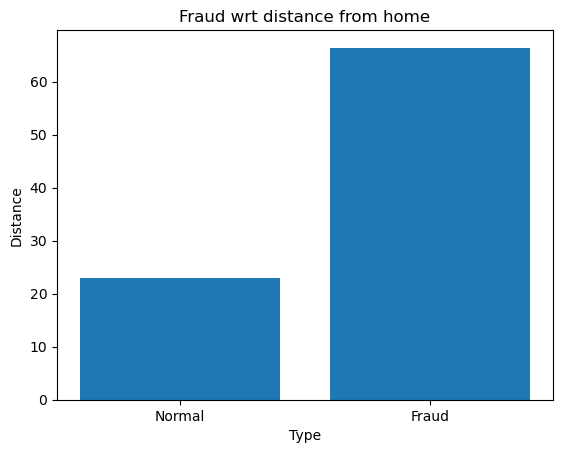

In [130]:
# Visualing fraud with respect to various features in dataframe

plt.title("Fraud wrt distance from home")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(distance_from_home)"])
plt.xlabel("Type")
plt.ylabel("Distance")
plt.show()



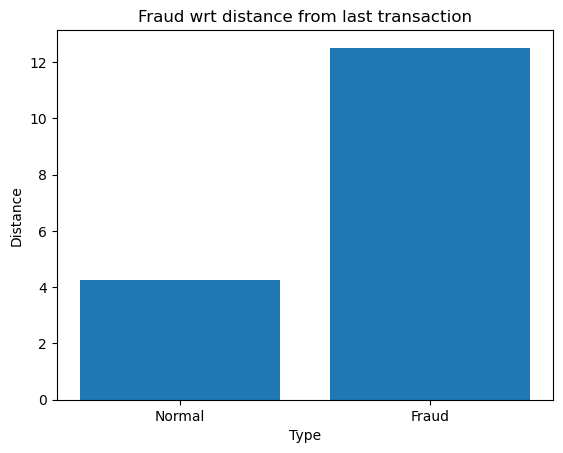

In [131]:
plt.title("Fraud wrt distance from last transaction")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(distance_from_last_transaction)"])
plt.xlabel("Type")
plt.ylabel("Distance")
plt.show()


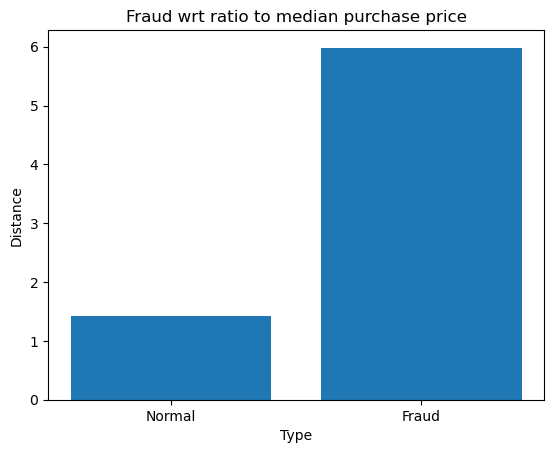

In [132]:
plt.title("Fraud wrt ratio to median purchase price")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(ratio_to_median_purchase_price)"])
plt.xlabel("Type")
plt.ylabel("Distance")
plt.show()

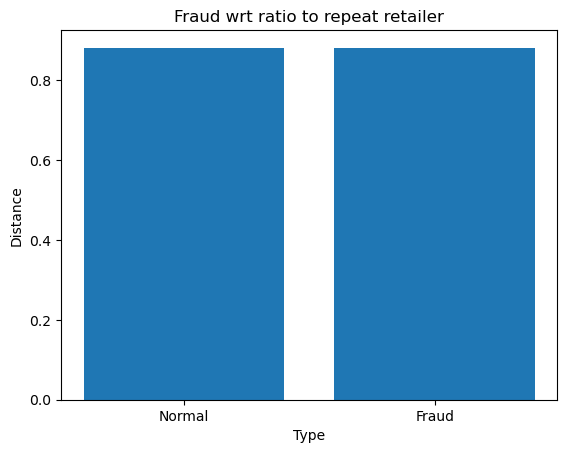

In [133]:
plt.title("Fraud wrt ratio to repeat retailer")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(repeat_retailer)"])
plt.xlabel("Type")
plt.ylabel("Distance")
plt.show()

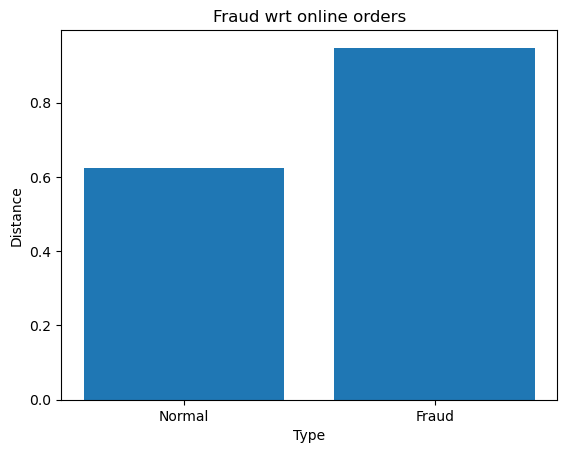

In [134]:
plt.title("Fraud wrt online orders")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(online_order)"])
plt.xlabel("Type")
plt.ylabel("Distance")
plt.show()

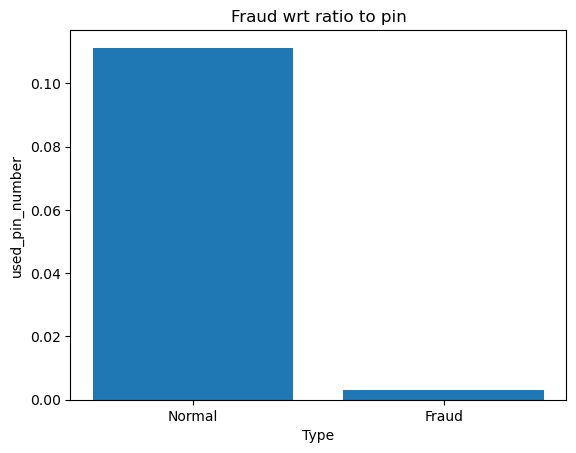

In [135]:
plt.title("Fraud wrt ratio to pin")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(used_pin_number)"])
plt.xlabel("Type")
plt.ylabel("used_pin_number")
plt.show()

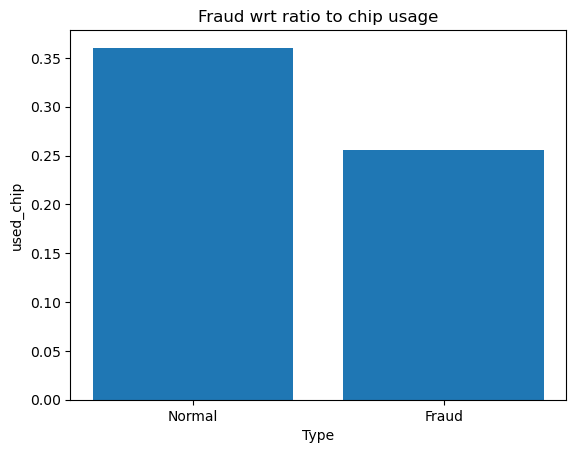

In [136]:
plt.title("Fraud wrt ratio to chip usage")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(used_chip)"])
plt.xlabel("Type")
plt.ylabel("used_chip")
plt.show()

In [137]:
#convert the original spark dataframe to a pandas dataframe
original_df = df.toPandas()
# create the labels set (y) from the "fraud" column,a nd then create the features (X) DataFrame from the remaining columns.
# Separate the data into labels and features
# Separate the y variable, the labels

y = original_df['fraud']

# Separate the X variable, the features
X = original_df.drop(columns=['fraud'])

X.head()


# Check the balance of our target values
y.value_counts()



fraud
0.0    228295
1.0     21705
Name: count, dtype: int64

In [138]:
 # Split the data into training and testing datasets by using train_test_split.
 # Split the data using train_test_split
# Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

Logistic Regression Model

In [139]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression


# Split the data using train_test_split
# Instantiate the Logistic Regression Model
# Assign a random_state parameter of  to the model
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
logistic = LogisticRegression(max_iter=1000,class_weight="balanced")


# Fit the model using training data
model = logistic.fit(x_train, y_train)

# Predict and Print the accuracy score of the model

prediction = model.predict(x_test)

accuracy_score(y_test,prediction)

print("Accuracy - " + str(accuracy_score(y_test,prediction)))
print("Recall - " + str(recall_score(y_test,prediction)))
print("precision - " + str(precision_score(y_test,prediction)))


Accuracy - 0.93264
Recall - 0.9534883720930233
precision - 0.5682636691040053


In [140]:
# Generate a confusion matrix for the model
generat_confusion_matrix = confusion_matrix(y_test,prediction)
print('Confusion Matrix is : ')
print(generat_confusion_matrix)

pd.DataFrame(Confusionmatrix,index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

acc_score = accuracy_score(y_test, prediction)
print(f"Accuracy Score : {acc_score}")

Confusion Matrix is : 
[[53083  3956]
 [  254  5207]]
Accuracy Score : 0.93264


In [141]:
# Print the classification report for the model
classification_report_model = classification_report(y_test,prediction)
print('Classificication Report For The Model is')
print(classification_report_model)

Classificication Report For The Model is
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     57039
         1.0       0.57      0.95      0.71      5461

    accuracy                           0.93     62500
   macro avg       0.78      0.94      0.84     62500
weighted avg       0.96      0.93      0.94     62500



Random Forest Method

In [142]:

# Split the data using train_test_split
# Instantiate the Random Classfier Model
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, random_state=42)
randomforest = RandomForestClassifier(class_weight = "balanced")



# Fit the model using training data

model1 = randomforest.fit(x1_train,y1_train)


#Predict and print accuracy score

prediction1 = model1.predict(x1_test)
accuracy_score(y1_test,prediction1)

print("Accuracy - " + str(accuracy_score(y1_test,prediction1)))
print("Recall - " + str(recall_score(y1_test,prediction1)))
print("precision - " + str(precision_score(y1_test,prediction1)))

Accuracy - 0.999984
Recall - 0.999816883354697
precision - 1.0


In [143]:
# Evaluate the model with confusion matrix and accuracy score

Confusionmatrix = confusion_matrix (y1_test,prediction1)
print('Confusion Matrix is : ')
print(Confusionmatrix)



pd.DataFrame(Confusionmatrix,index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])


acc_score = accuracy_score(y1_test, prediction1)
print(f"Accuracy Score : {acc_score}")

Confusion Matrix is : 
[[57039     0]
 [    1  5460]]
Accuracy Score : 0.999984


In [144]:
# Look at the classification report
print("Classification Report")
print(classification_report(y1_test, prediction1))

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57039
         1.0       1.00      1.00      1.00      5461

    accuracy                           1.00     62500
   macro avg       1.00      1.00      1.00     62500
weighted avg       1.00      1.00      1.00     62500



In [145]:
#instantiate StandardScaler object
scaler = StandardScaler()

#scale data
x_train_scaled = scaler.fit_transform(X_train)

x_test_scaled = scaler.fit_transform(X_test)

#import model object
from sklearn.neural_network import MLPClassifier
model =  MLPClassifier(max_iter=1000,  alpha=1)

#train model on training data
model.fit(x_train_scaled, y_train)

#getting model performance on test data
print("accuracy:", model.score(x_test_scaled, y_test))

accuracy: 0.912624


In [146]:
# The following method accepts inputs from the gradio interface and provides prediction output. This app was build using random forest model.
#prediction1 = model1.predict(x1_test)
def credit_card_features(distance_from_home,	distance_from_last_transaction,	ratio_to_median_purchase_price,	repeat_retailer,	used_chip,	used_pin_number,	online_order):
#turning the arguments into a numpy array
  x = np.array([distance_from_home,	distance_from_last_transaction,	ratio_to_median_purchase_price,	repeat_retailer,	used_chip,	used_pin_number,	online_order])
  #prediction = model1.predict(x.reshape(1, -1))
  prediction = model1.predict(x.reshape(1, -1))
  return prediction

# The models predicted output for above feature input is output to a text box on the gradio interface
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=credit_card_features, inputs=['number','number','number','number','number','number','number'], outputs=outputs,description="Check Credit Card Fraud")

Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

In [147]:
# launching the app

app.launch(share=True,debug=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://0d3ec9ed43449ff7ee.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0d3ec9ed43449ff7ee.gradio.live
